# Практика

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline
import statsmodels.stats.weightstats as ssw

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [2]:
# Распределение gennorm https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gennorm.html#scipy.stats.gennorm
gennorm_rv = sts.gennorm(2)
sample = gennorm_rv.rvs(100)
sample

array([-1.71073463e-01,  4.37607791e-01, -2.52727158e-01, -7.70041714e-02,
        1.16944886e-01,  5.74301155e-02, -4.09774876e-02, -8.21229254e-01,
        1.21008142e+00, -1.02502731e+00, -1.25279399e+00, -5.25773160e-01,
       -7.21447414e-01,  5.18929675e-01, -9.45816397e-02, -9.16505086e-01,
       -1.44943620e+00,  9.38746969e-01, -1.32336859e-01, -4.72172768e-01,
       -2.60955059e-02,  7.42550036e-01,  4.58839274e-01, -8.61597081e-02,
        3.51867995e-01, -1.01131130e+00,  8.28110755e-02, -1.00823559e+00,
        2.63544251e-01,  7.47821998e-01,  2.75512188e-01, -3.42879796e-01,
        9.11131888e-01,  1.20063952e+00, -9.21534210e-01,  2.52633384e-01,
       -7.53562266e-02, -2.14675432e-02, -1.37729952e-01,  3.83412726e-01,
        9.15465789e-01, -3.36158397e-01, -8.40708339e-01, -1.04907880e-01,
       -2.09315299e+00, -3.32386190e-02,  1.25676509e-01,  1.49914926e+00,
       -3.73795094e-01,  3.92513533e-01, -4.45930290e-01,  1.69467995e+00,
       -6.31568645e-01,  

In [3]:
sample.dtype

dtype('float64')

In [4]:
real_mean = gennorm_rv.mean() # настоящее среднее случайной величины
real_mean

0.0

In [5]:
real_var = gennorm_rv.var() # настоящая дисперсия случайной величины
real_var

0.5000000000000001

### Постройте гистограмму выборки и теоретическую плотность распределения

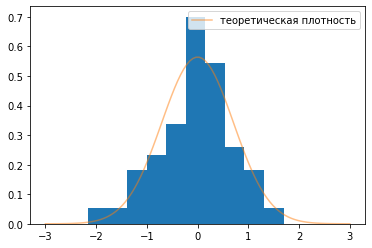

In [6]:
# График гистограммы выборки
plt.hist(sample, density=True)
x = np.linspace(-3,3,100)
pdf = gennorm_rv.pdf(x)
# График теоретической плотности распределения
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [7]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

-0.01079319269711252
0.5355775512140658


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

[]

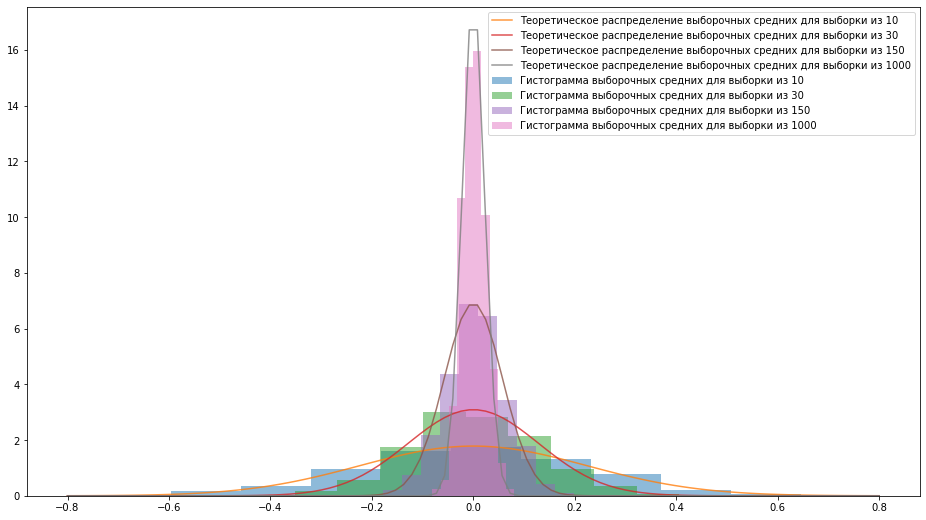

In [76]:
# Построение гистограмм выборочных средних и теоретических распределений выборочных средних по ЦПТ для разных объёмов выборок на одном графике
plt.figure(figsize=(16,9))
for N in [10, 30, 150, 1000]:
    # сгенерируем много выборочных средних
    means = []
    for i in range(1000):
        means.append(np.mean(gennorm_rv.rvs(N)))
    means = np.array(means).astype(np.float32)
    # Гистограмма выборочных средних
    plt.hist(means, density=True, alpha=0.5)
    # Теоретическое распределение выборочных средних по ЦПТ
    norm_rv = sts.norm(loc=gennorm_rv.mean(), scale=gennorm_rv.std() / np.sqrt(N))
    x = np.linspace(-0.8,0.8, 100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, alpha=0.8)
plt.legend(['Теоретическое распределение выборочных средних для выборки из 10',
            'Теоретическое распределение выборочных средних для выборки из 30',
            'Теоретическое распределение выборочных средних для выборки из 150',
            'Теоретическое распределение выборочных средних для выборки из 1000',
            'Гистограмма выборочных средних для выборки из 10',
            'Гистограмма выборочных средних для выборки из 30',
            'Гистограмма выборочных средних для выборки из 150',
            'Гистограмма выборочных средних для выборки из 1000'])
plt.plot()

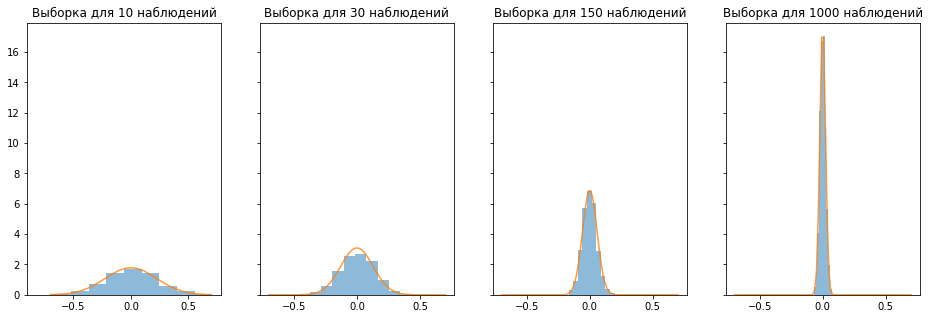

In [10]:
# Построение гистограмм выборочных средних и теоретических распределений выборочных средних по ЦПТ для разных объёмов выборок на разных графиках
size_sample = [10, 30, 150, 1000]
fig, ax = plt.subplots(nrows=1, ncols=4, sharey=True)
ax1, ax2, ax3, ax4 = ax.flatten()
num_ax = 0
for N in size_sample:
    # сгенерируем много выборочных средних
    means = []
    for i in range(1000):
        means.append(np.mean(gennorm_rv.rvs(N)))
    means = np.array(means).astype(np.float32)
    # Гистограмма выборочных средних
    ax[num_ax].hist(means, density=True, alpha=0.5)
    # Теоретическое распределение выборочных средних по ЦПТ
    norm_rv = sts.norm(loc=gennorm_rv.mean(), scale=gennorm_rv.std() / np.sqrt(N))   
    x = np.linspace(-0.7,0.7, 100)
    pdf = norm_rv.pdf(x)
    ax[num_ax].plot(x, pdf, alpha=0.8)
    ax[num_ax].set_title('Выборка для {} наблюдений'.format(N))
    num_ax += 1
fig.set_size_inches(16,5);


Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

Вывод: для выбранного распределения апроксимация распределения выборочного среднего работает хорошо, особенно при увеличении размера выборки

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [11]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


Формируем датафреймы с разбивкой по признаку ушел/не ушел клиент

In [24]:
# Датафрейм c дневным количеством звонков для клиентов, которые не ушли
df_notchurn = df[df['churn'] == False]['total day calls'].copy()
df_notchurn.shape

(2850,)

In [25]:
# Датафрейм c дневным количеством звонков для клиентов, которые ушли
df_churn = df[df['churn'] == True]['total day calls'].copy()
df_churn.shape

(483,)

Построим гистограммы выборок

[]

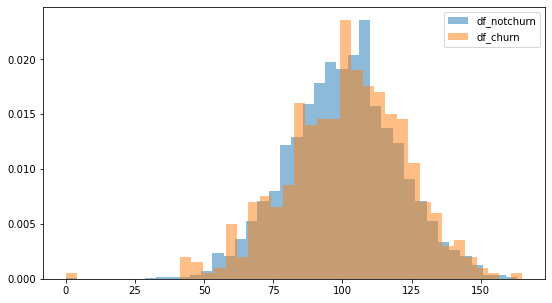

In [33]:
plt.figure(figsize=(9,5))
plt.hist(df_notchurn, density=True, bins=40, alpha=0.5)
plt.hist(df_churn, density=True, bins=40, alpha=0.5) 
plt.legend(['df_notchurn', 'df_churn'])
plt.plot()

По гистограммам видно, что ушел или не ушел клиент не зависит от количества звонков в день, распределение визуально схоже с нормальным

Рассчитаем характеристики распределений

In [47]:
df_notchurn_mean = np.mean(df_notchurn)
print("Выборочное среднее для {} равно: {}".format('df_notchurn', df_notchurn_mean))
df_churn_mean = np.mean(df_churn)
print("Выборочное среднее для {} равно: {}".format('df_churn', df_churn_mean))
print()
df_notchurn_std = np.std(df_notchurn, ddof=1)
print("Выборочное стандартное отклонение для {} равно: {}".format('df_notchurn', df_notchurn_std))
df_churn_std = np.std(df_churn, ddof=1)
print("Выборочное стандартное отклонение для {} равно: {}".format('df_churn', df_churn_std))
print()
df_notchurn_var = np.std(df_notchurn, ddof=1) / np.sqrt((len(df_notchurn))-1)
print("Выборочная дисперсия для {} равна: {}".format('df_notchurn', df_notchurn_var))
df_churn_var = np.std(df_churn, ddof=1) / np.sqrt((len(df_churn))-1)
print("Выборочная дисперсия для {} равна: {}".format('df_churn', df_churn_var))

Выборочное среднее для df_notchurn равно: 100.28315789473685
Выборочное среднее для df_churn равно: 101.33540372670808

Выборочное стандартное отклонение для df_notchurn равно: 19.801156951805503
Выборочное стандартное отклонение для df_churn равно: 21.58230721307551

Выборочная дисперсия для df_notchurn равна: 0.37097474207741105
Выборочная дисперсия для df_churn равна: 0.9830471559749713


Рассчитаем 95% доверительные интервалы с использованием явной формулы для z интервала, а затем с помощью функции 
`from statsmodels.stats.weightstats import _zconfint_generic`

In [45]:
print("Доверительный интервал для среднего {} по цпт с использованием интервальной оценки: {} ".format('df_notchurn',
      sts.norm.interval(alpha=0.95, loc=df_notchurn_mean, scale=df_notchurn_var)))   # alternative 'two-sided' only

print("Доверительный интервал для среднего {} по цпт методом _zconfint_generic: {} ".format('df_notchurn',
      ssw._zconfint_generic(df_notchurn_mean,  np.std(df_notchurn, ddof=1), alpha=0.95, alternative='two-sided')))

print("Доверительный интервал для среднего {} по цпт с использованием интервальной оценки: {} ".format('df_churn',
      sts.norm.interval(alpha=0.95, loc=df_churn_mean, scale=df_churn_var)))   # alternative 'two-sided' only

print("Доверительный интервал для среднего {} по цпт методом _zconfint_generic: {} ".format('df_churn',
      ssw._zconfint_generic(df_churn_mean,  np.std(df_churn, ddof=1), alpha=0.95, alternative='two-sided')))

Доверительный интервал для среднего df_notchurn по цпт с использованием интервальной оценки: (99.55606076109109, 101.0102550283826) 
Доверительный интервал для среднего df_notchurn по цпт методом _zconfint_generic: (99.04149114274125, 101.52482464673244) 
Доверительный интервал для среднего df_churn по цпт с использованием интервальной оценки: (99.40866670589261, 103.26214074752355) 
Доверительный интервал для среднего df_churn по цпт методом _zconfint_generic: (99.98204678079553, 102.68876067262063) 


Вывод: при меньшем объеме выборки доверительный интервал, рассчитанный с помощью метода _zconfint_generic, уже, чем рассчитанный с использованием интервальной оценки, и наоборот, при большем объеме выборки доверительный интервал, рассчитанный с помощью метода интервальной оценки уже, чем рассчитанный с помощьюю метода _zconfint_generic.